(-0.5, 3839.5, 2159.5, -0.5)

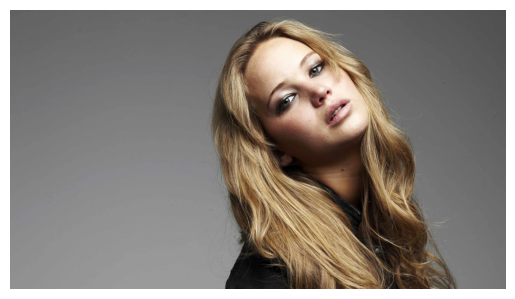

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img=cv2.imread('a1images/jeniffer.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.axis('off')

In [17]:
img_hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
H, S, V = cv2.split(img_hsv)

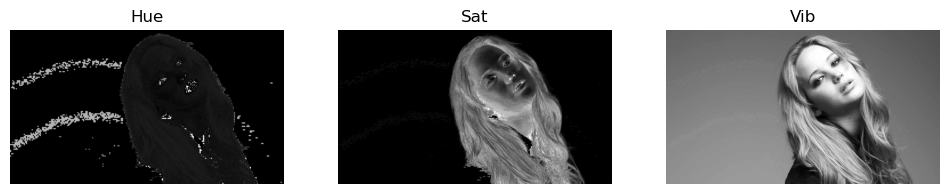

In [21]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(H, cmap='gray')
plt.title('Hue')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(S, cmap='gray')
plt.title('Sat')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(V, cmap='gray')
plt.title('Vib')
plt.axis('off')

plt.show()

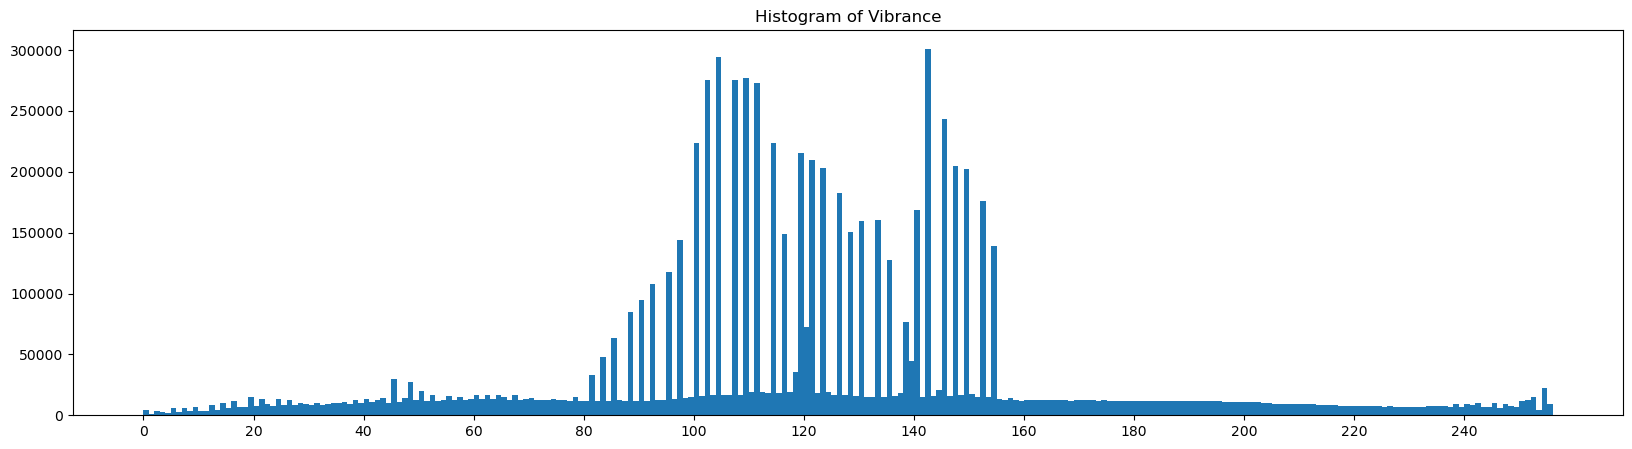

In [55]:
plt.figure(figsize=(20,5))
plt.hist(V.ravel(), 256, [0, 256])
plt.xticks(range(0, 257, 20))
plt.title('Histogram of Vibrance')
plt.show()

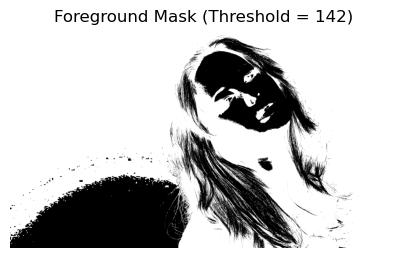

In [93]:
threshold_value = 142
_, mask = cv2.threshold(V, threshold_value, 255, cv2.THRESH_BINARY_INV)

plt.figure(figsize=(5, 5))
plt.imshow(mask, cmap='gray')
plt.title(f'Foreground Mask (Threshold = {threshold_value})')
plt.axis('off')
plt.show()

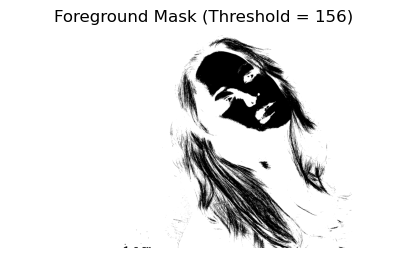

In [97]:
threshold_value = 156
_, mask = cv2.threshold(V, threshold_value, 255, cv2.THRESH_BINARY_INV)

plt.figure(figsize=(5, 5))
plt.imshow(mask, cmap='gray')
plt.title(f'Foreground Mask (Threshold = {threshold_value})')
plt.axis('off')
plt.show()

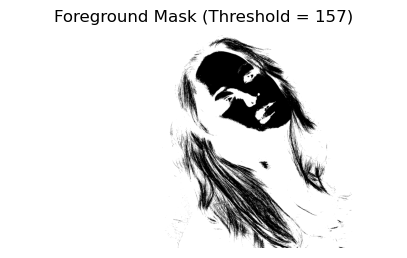

In [103]:
threshold_value = 157
_, img_mask = cv2.threshold(V, threshold_value, 255, cv2.THRESH_BINARY_INV)

plt.figure(figsize=(5, 5))
plt.imshow(img_mask, cmap='gray')
plt.title(f'Foreground Mask (Threshold = {threshold_value})')
plt.axis('off')
plt.show()

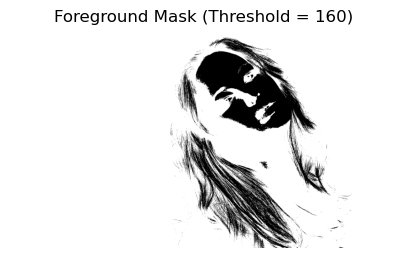

In [143]:
threshold_value = 160
_, img_mask = cv2.threshold(V, threshold_value, 255, cv2.THRESH_BINARY_INV)

plt.figure(figsize=(5, 5))
plt.imshow(img_mask, cmap='gray')
plt.title(f'Foreground Mask (Threshold = {threshold_value})')
plt.axis('off')
plt.show()

In [105]:
img_foreground = cv2.bitwise_and(img_hsv, img_hsv, mask=img_mask)

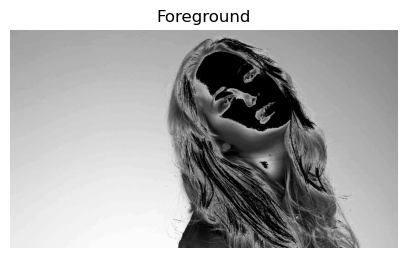

In [111]:
fg_gray = cv2.cvtColor(img_foreground, cv2.COLOR_HSV2BGR)
fg_gray = cv2.cvtColor(fg_gray, cv2.COLOR_BGR2GRAY)

hist_fg, bins = np.histogram(fg_gray.ravel(), 256, [0, 256])

plt.figure(figsize=(5, 5))
plt.imshow(fg_gray, cmap='gray')
plt.title('Foreground')
plt.axis('off')
plt.show()

In [117]:
cdf = hist_fg.cumsum()
cdf_normalized = cdf * 255 / cdf[-1] 

lut_eq = np.zeros(256, dtype=np.uint8)
lut_eq[fg_gray.min():fg_gray.max() + 1] = np.interp(range(fg_gray.min(), fg_gray.max() + 1), bins[:-1], cdf_normalized)

fg_equalized = cv2.LUT(fg_gray, lut_eq)

In [119]:
background = cv2.bitwise_and(img_hsv, img_hsv, mask=cv2.bitwise_not(img_mask))

fg_hsv = cv2.cvtColor(fg_equalized, cv2.COLOR_GRAY2BGR)
fg_hsv = cv2.cvtColor(fg_hsv, cv2.COLOR_BGR2HSV)

result = cv2.bitwise_or(background, fg_hsv)

result_bgr = cv2.cvtColor(result, cv2.COLOR_HSV2BGR)

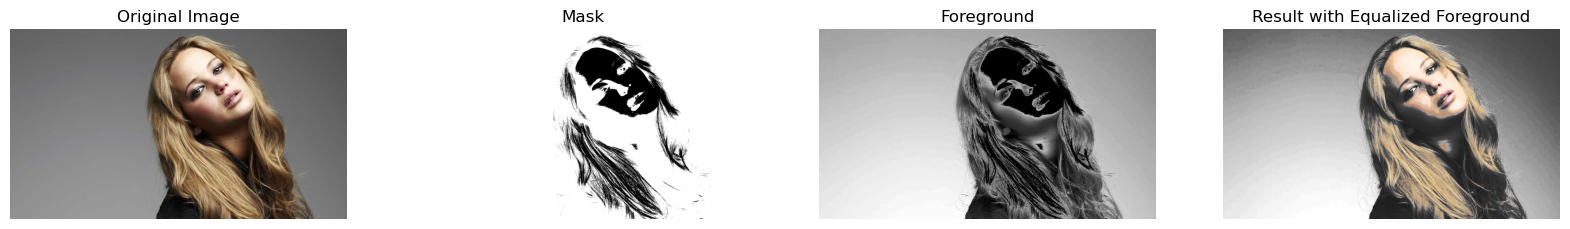

In [147]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(img_mask, cmap='gray')
plt.title('Mask')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(fg_gray, cmap='gray')
plt.title('Foreground')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(result_bgr, cv2.COLOR_BGR2RGB))
plt.title('Result with Equalized Foreground')
plt.axis('off')

plt.show()

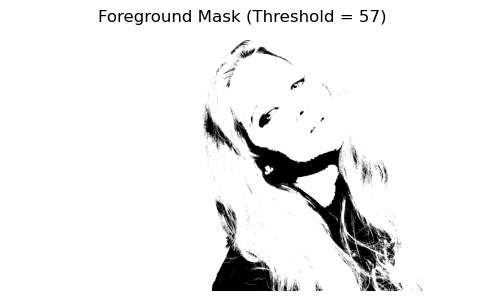

In [219]:
threshold_value = 57
_, mask = cv2.threshold(V, threshold_value, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(6, 4))
plt.imshow(mask, cmap='gray')
plt.title(f'Foreground Mask (Threshold = {threshold_value})')
plt.axis('off')
plt.show()


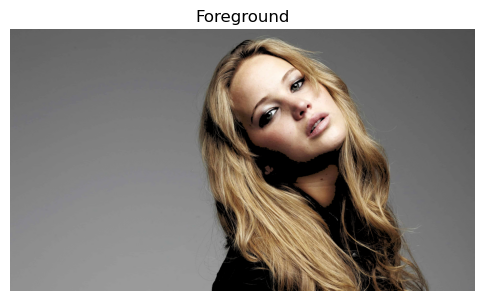

In [221]:
foreground = cv2.bitwise_and(img_hsv, img_hsv, mask=mask)

plt.figure(figsize=(6, 4))
plt.imshow(cv2.cvtColor(cv2.cvtColor(foreground, cv2.COLOR_HSV2BGR), cv2.COLOR_BGR2RGB))
plt.title('Foreground')
plt.axis('off')
plt.show()

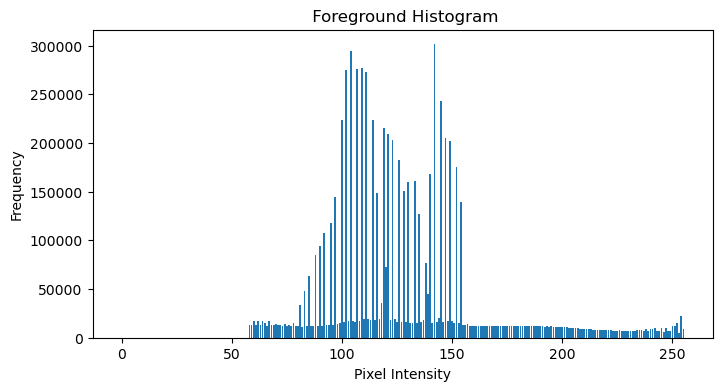

In [223]:
_, _, fg_V = cv2.split(foreground)
fg_pixels = fg_V[fg_V > 0]
hist, bins = np.histogram(fg_pixels, 256, [0, 256])

plt.figure(figsize=(8, 4))
plt.bar(range(256), hist)
plt.title(' Foreground Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

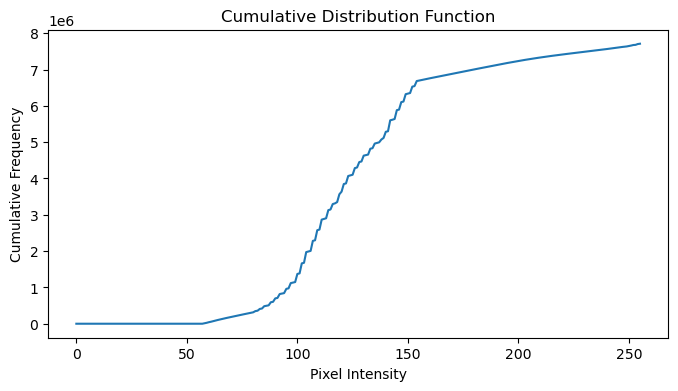

In [225]:
cdf = np.cumsum(hist)

plt.figure(figsize=(8, 4))
plt.plot(cdf)
plt.title('Cumulative Distribution Function')
plt.xlabel('Pixel Intensity')
plt.ylabel('Cumulative Frequency')
plt.show()

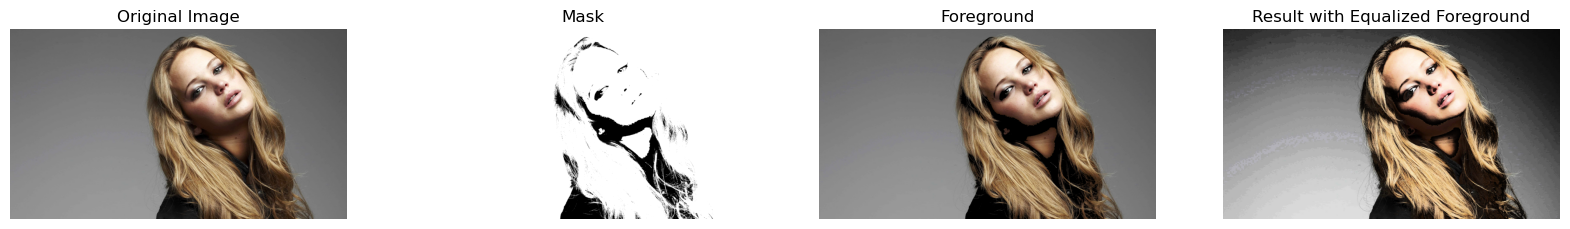

In [227]:
cdf_min = cdf[cdf > 0].min()
total_pixels = len(fg_pixels)

lut = np.zeros(256, dtype=np.uint8)
for i in range(256):
    if hist[i] > 0: 
        lut[i] = np.round((cdf[i] - cdf_min) * 255 / (total_pixels - cdf_min))

V_equalized = V.copy()
mask_indices = mask > 0
V_equalized[mask_indices] = lut[V[mask_indices]]

background = cv2.bitwise_and(img_hsv, img_hsv, mask=cv2.bitwise_not(mask))

H_eq, S_eq, _ = cv2.split(foreground) 
fg_equalized = cv2.merge([H_eq, S_eq, cv2.bitwise_and(V_equalized, V_equalized, mask=mask)])

result = cv2.bitwise_or(background, fg_equalized)
result_bgr = cv2.cvtColor(result, cv2.COLOR_HSV2BGR)

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(mask, cmap='gray')
plt.title('Mask')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(cv2.cvtColor(foreground, cv2.COLOR_HSV2BGR), cv2.COLOR_BGR2RGB))
plt.title('Foreground')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(result_bgr, cv2.COLOR_BGR2RGB))
plt.title('Result with Equalized Foreground')
plt.axis('off')
plt.show()


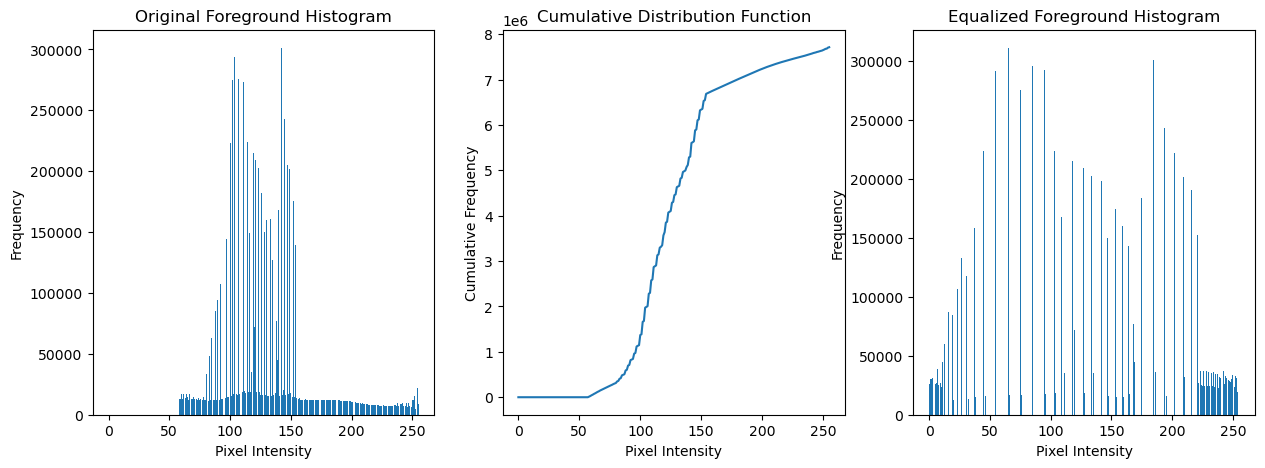

In [229]:

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.bar(range(256), hist)
plt.title('Original Foreground Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.plot(cdf)
plt.title('Cumulative Distribution Function')
plt.xlabel('Pixel Intensity')
plt.ylabel('Cumulative Frequency')

plt.subplot(1, 3, 3)
equalized_pixels = V_equalized[mask_indices]
hist_eq, _ = np.histogram(equalized_pixels, 256, [0, 256])
plt.bar(range(256), hist_eq)
plt.title('Equalized Foreground Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()